In [1]:
## Note (update): Additional code is added after milestone 3 below.
## Note: Milestone 1, 2, and 3 are submitted together. Scroll down to view milestone 3 content

# Mithil Patel
# Updated: DSC 550 - Week 8 Assignment
# Updated: 11/19/2022

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing databaseout
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
# Checking for NaNs
print("Dataframe shape:",df.shape)
df.isnull().sum()

Dataframe shape: (614, 13)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
# Disabling warning message
import warnings
warnings.filterwarnings("ignore")

# Finding categorial columns
categorical_list = df.select_dtypes(['object']).columns

# Replacing NaNs in categorical columns with columns mode
df[categorical_list] = df[categorical_list].fillna(df.mode().iloc[0])

# Finding numerical columns
numerical_list = df.select_dtypes(['float64','int64']).columns

# Replacing NaNs in numerical columns with columns median
df[numerical_list] = df[numerical_list].fillna(df.median())

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Since there exist a 3+ in Dependents column, let's examine the column
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [5]:
# Replacing categorial columns with numerical
df.replace({'Gender':{'Female':0,'Male': 1}},inplace = True)
df.replace({'Married':{'No':0,'Yes': 1}},inplace = True)
df.replace({'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3}}, inplace = True)
df.replace({'Education':{'Not Graduate':0,'Graduate': 1}},inplace = True)
df.replace({'Self_Employed':{'No':0,'Yes': 1}},inplace = True)
df.replace({'Property_Area':{'Rural':0,'Semiurban': 1,'Urban': 2}},inplace = True)
df.replace({'Loan_Status':{'N':0,'Y': 1}},inplace = True)

# Dropping ID column
df = df.drop(columns=['Loan_ID'])

# Displaying transformed dataframe
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


<AxesSubplot:>

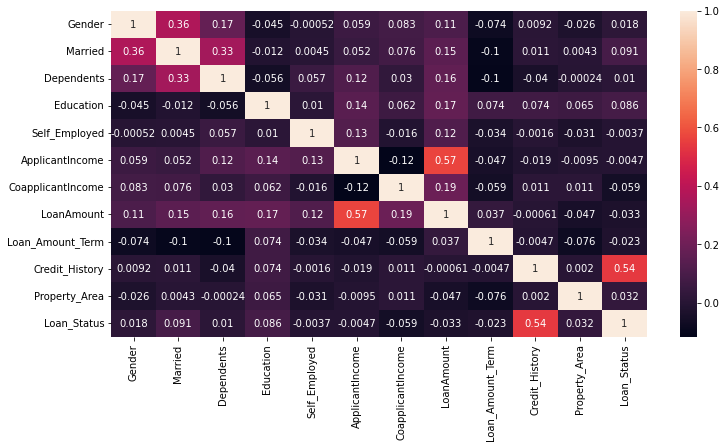

In [6]:
# Investigating a correlation between explanatory variable and response variable
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot = True)

Fig 1. Correlation heatmap of each attributes

Due to a slight correlation between LoanAmount and ApplicantIncome, let's generate a scatter plot to further understand the correlationship. Additionally, we should separate by gender to investigate any trend.

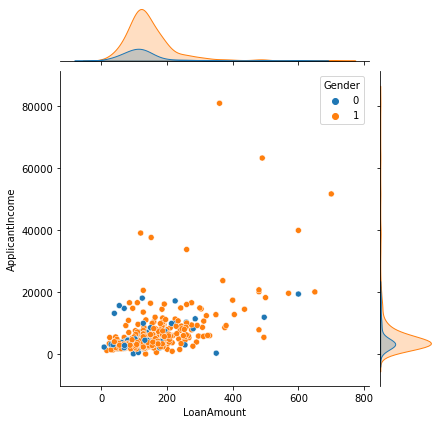

In [7]:
# A ApplicantIncome vs LoanAmount scatterplot while grouping by gender
sns.jointplot(data=df, x="LoanAmount", y="ApplicantIncome", hue="Gender")

Fig 2. A ApplicantIncome vs LoanAmount scatterplot

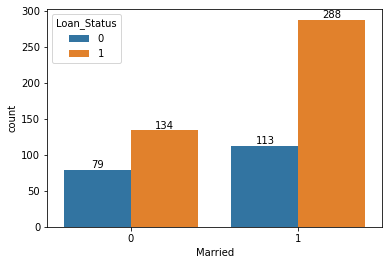

In [8]:
# Creating count plot of married cloumn while grouping by loan status
ax = sns.countplot(data= df, x='Married', hue='Loan_Status')
for container in ax.containers:
    ax.bar_label(container)

Fig 3. A count plot of martial status grouped by loan status

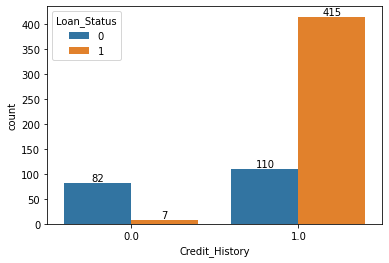

In [9]:
# Creating count plot for credit history while grouping by loan status
ax = sns.countplot(data= df, x='Credit_History', hue='Loan_Status')
for container in ax.containers:
    ax.bar_label(container)

Fig 4. A count plot of credit history grouped by loan status

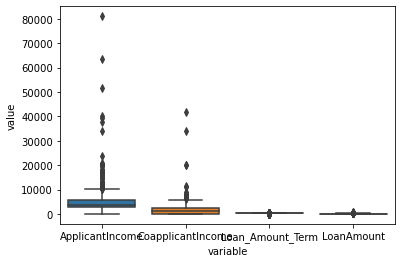

In [10]:
# Checking for extreme values in float data-type column
sns_df = pd.DataFrame(data=df, columns=['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount'])
sns.boxplot(x="variable", y="value", data=pd.melt(sns_df))
plt.show()

Fig 5. Boxplot of four attributes (ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, and LoanAmount)

In [11]:
# Calculating z-score for ApplicantIncome and CoapplicantIncome
# Removing rows with z-score above 3
df['App_zscore'] = (df.ApplicantIncome - df.ApplicantIncome.mean())/df.ApplicantIncome.std(ddof=0)
df = df[(df.App_zscore < 3)]

df['Coapp_zscore'] = (df.CoapplicantIncome - df.CoapplicantIncome.mean())/df.CoapplicantIncome.std(ddof=0)
df = df[(df.Coapp_zscore < 3)]

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,App_zscore,Coapp_zscore
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,0.072991,-0.556975
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,-0.134412,-0.043204
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,-0.393747,-0.556975
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,-0.462062,0.246389
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,0.097728,-0.556975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,-0.410130,-0.556975
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1,-0.212557,-0.556975
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1,0.437174,-0.475208
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1,0.357064,-0.556975


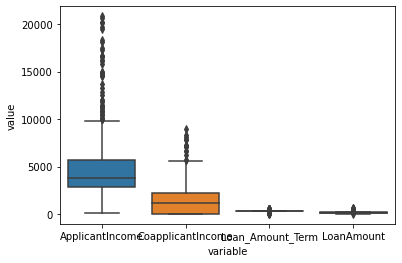

In [12]:
# Boxplot after removing extreme values
sns_df = pd.DataFrame(data=df, columns=['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount'])
sns.boxplot(x="variable", y="value", data=pd.melt(sns_df))
plt.show()

Fig 6. Boxplot of four attributes removing outliers.

   A major problem Americans are currently facing is a large amount of consumer debt, reportedly around a total of $14 trillion is owed collectively. 80% of Americans have some sort of consumer debt with 13% of Americans not ever being able to fully pay off their debts. This has led to many companies and banks losing money that they were not able to acquire back from giving loans out to consumers. To solve the issue, I ought to create a model that would be able to analyze attributes for the lenders (i.e., banks) giving out loans and help prevent companies from losing billions of dollars. 

For our analysis, I will identify attributes primarily used in the selection process and uncover overlooked attributed to improving consumer loan repaying rates. I shall begin the quest by searching for a good dataset since a dataset is fundamental for a data scientist to tackle issues and provide confidence in a given resolution. For this project, I will extract a dataset from Kaggle containing attributes related to age, marriage, education, credit history, credit loan approval, etc. The dataset will help determine the most common attributes companies used to determine how they were giving out loans to individuals. Upon applying transforming techniques to clean our dataset, I can utilize data visualization techniques to explore data to unravel attributes pertaining to consumers' ability to repay loans. 

The correlation heatmap showed that credit history was the primary factor used by companies to allow loans (Fig. 1). Furthermore, marital status is a good indicator for companies to approve loans. There were a lot more given approvals for loans than non-married couples and men seemed to receive a majority of the loans. Count plots shown in figure 3 & 4 provides further evidence to support our previous claims regarding credit history and marital status variable. An income vs loan amount scatterplot depicts the loan approval rate amongst male participants as a significant rate compared to females (Fig. 2). One explanation for the male loan approval rate is that the male participants may be the primary source of income and will be more likely to get approved for a loan. In order to maintain our statistical analysis significant and avoid skewing our results, I created boxplots to display extreme data points in our dataset (Fig. 5 & 6). To handle outliers, I calculated the z-score for columns with outliers and remove any data points higher than 3. For future development, an additional dataset is recommended to analyze other attributes such as student loan status to improve the overall prediction of our model to optimize revenue for companies lending money to consumers. 

In conclusion, companies tend to primarily focus on an applicant’s credit history to determine loan eligibility. Furthermore, it appears as if companies unconsciously emphasize an applicant’s marital status and gender to determine whether someone should get a loan. Companies should utilize secondary variables to make efficient decisions instead of relying on one or two attributes. Hopefully, our predictive model can be used to discover secondary variables companies can use to make wise decisions when approving loans.

Milestone 2


Note: Several transformation were performed during milestone 1 to properly create visualizations. 

Transformation 1: Replacing categorial columns with numerical using the .replace() function

Transformation 2: Dropping irrelevent columns

Transformation 3: Replacing NaN's rows with mode (categorgical) or mean (numerical) values 

Transformation 4: Remove outliers using the standard z-score condition

In [13]:
# Transformation 5: Dropping z score columns from the dataset
df = df.drop(columns=['App_zscore','Coapp_zscore'])

In [14]:
# Transformation 6: Scaling high range columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
transform_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
df[transform_columns] = min_max_scaler.fit_transform(df[transform_columns])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,0.275540,0.000000,0.185647,0.743590,1.0,2,1
1,1,1,1,1,0,0.214331,0.167929,0.185647,0.743590,1.0,0,0
2,1,1,0,1,1,0.137794,0.000000,0.088924,0.743590,1.0,2,1
3,1,1,0,0,0,0.117633,0.262584,0.173167,0.743590,1.0,2,1
4,1,0,0,1,0,0.282841,0.000000,0.205928,0.743590,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,0.132959,0.000000,0.096724,0.743590,1.0,0,1
610,1,1,3,1,0,0.191268,0.000000,0.048362,0.358974,1.0,0,1
611,1,1,1,1,0,0.383020,0.026726,0.380655,0.743590,1.0,2,1
612,1,1,2,1,0,0.359377,0.000000,0.277691,0.743590,1.0,2,1


Now that we have our dataframe cleaned through various transformation techniques, we are ready to create a machine-learning model to analyze our data. 

Milestone 3 

In [15]:
# Splitting our dataframe into exploratory and dependent variable.
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)

In [16]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Checking for best pipeline option by calculating the accuracy for each classifier
pipe_knn = Pipeline(steps=[
    ("MinMaxScaler",MinMaxScaler()),
    ("knn_classifier", KNeighborsClassifier())])

pipe_log = Pipeline(steps=[
    ("MinMaxScaler2",MinMaxScaler()),
    ("log_classifier", LogisticRegression(random_state=0))])

pipe_random = Pipeline(steps=[
    ("MinMaxScaler3",MinMaxScaler()),
    ("ran_classifier", RandomForestClassifier(random_state=0))])

pipes = [pipe_knn,pipe_log,pipe_random]
pipes_dict = {0:'KNN', 1: 'Logistic Regression', 2: 'Random Forest'}
for pipe in pipes:
    pipe.fit(x_train,y_train)

accuracy = 0.0
classifier = -1
for i, mod in enumerate(pipes):
    if mod.score(x_test,y_test)> accuracy:
        accuracy = mod.score(x_test,y_test)
        classifier = i
print(f"Best classifier: {pipes_dict[classifier]} with accuracy: {accuracy}")

Best classifier: Logistic Regression with accuracy: 0.8416666666666667


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import GridSearchCV

# Initializing classes
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = LogisticRegression()
clf3 = RandomForestClassifier()
clf4 = DecisionTreeClassifier()
clf5 = SVC()

# Creating a pipeline 
pipe = Pipeline(steps=[
    ("MinMaxScaler",MinMaxScaler()),
    ("classifier", LogisticRegression())])

# Creating a dictionary with classifier parameter
para1 = {}
para1['classifier__n_neighbors'] = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
para1['classifier__weights'] = ['uniform','distance']
para1['classifier__metric'] = ['minkowski','euclidean','manhattan']
para1['classifier'] = [clf1]

para2 = {}
para2["classifier__penalty"] = ['l1', 'l2']
para2["classifier__C"] = np.logspace(0, 4, 10)
para2["classifier__solver"] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
para2["classifier"] = [clf2]

para3 = {}
para3["classifier__n_estimators"] = [10, 100, 1000]
para3["classifier__max_features"] = [1, 2, 3]
para3["classifier"] = [clf3]

para4 = {}
para4['classifier__max_depth'] = [5,10,25,None]
para4['classifier__min_samples_split'] = [2,5,10]
para4['classifier'] = [clf4]

para5 = {}
para5['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
para5['classifier__kernel'] = ['linear', 'rbf', 'poly'] 
para5['classifier__gamma'] = [1,0.1,0.01,0.001]
para5['classifier'] = [clf5]

search_space = [para1,para2,para3,para4,para5]

# Training gridSearch model with multiple models
grid = GridSearchCV(pipe, param_grid= search_space, cv=5).fit(x_train, y_train)

In [18]:
# Displaying best model and accuracy
print('Best model:', grid.best_estimator_.get_params()['classifier'])
print('Best model accuracy:', grid.best_score_)

Best model: LogisticRegression(penalty='l1', solver='liblinear')
Best model accuracy: 0.8083333333333333


In [19]:
# Displaying best parameter for our model
grid.best_params_

{'classifier': LogisticRegression(penalty='l1', solver='liblinear'),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

The GridSearchCV somehow lowered the accuracy of our model; therefore, we will proceed with fit pipeline to create a logistic model.

In [20]:
# Creating a logistic model
from sklearn.metrics import confusion_matrix

log_model = LogisticRegression(penalty='l2', C= 1.0, solver='liblinear')
lr_fit = log_model.fit(x_train,y_train)

# Predicting y value
y_pred = lr_fit.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# calculating accuracy
TN = conf_matrix[0][0] # True negative
FP = conf_matrix[0][1] # False positive
FN = conf_matrix[1][0] # False negative
TP = conf_matrix[1][1] # True Positive
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Logistic Regression classifier model accuracy:", accuracy)

Confusion Matrix:
 [[16 18]
 [ 1 85]]
Logistic Regression classifier model accuracy: 0.8416666666666667


Summary/Overview

For our dataset, I have decided to test various pipelines along with MinMaxScaler to determine the classifier with the highest accuracy. Further, I tuned the parameters for multiple classification models with GridSearchCV to discover the optimal parameters required to achieve the best accuracy score. Based on the result from both techniques, I determined that the LogisticRegression model is ideal in our case with approximately 84 percent accuracy, which is phenomenal for real-world scenarios. Considering the high accuracy of our model, we can conclude that businesses can venture beyond one or two factors and adopt other factors (i.e., ApplicantIncome, education, etc.) to determine loan approval status.

In [ ]:
# Added code after milestone 3

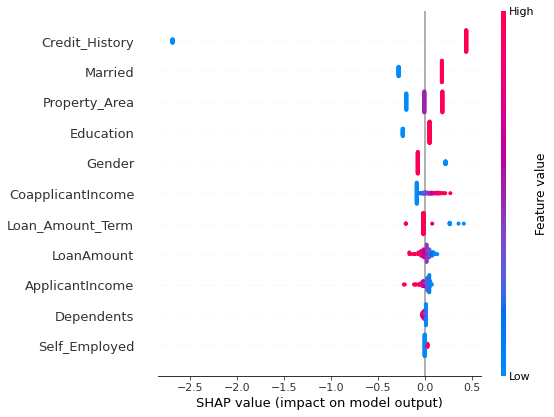

In [21]:
# Creating a SHAP dependence plots for our logistic regression model
import shap
explainer = shap.LinearExplainer(lr_fit, x_train, feature_dependence="independent")
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

In [22]:
# Calculating Precision
precision =  (TP)/(TP + FP)

# Calculating Recall
recall = (TP)/(TP + FN)

# Calculating F1 score
F1 = 2 * ((precision * recall)/(precision + recall))

# Display result
print("Logistic Regression\n")
print(f"Precision: {precision} \nRecall: {recall} \nF1 = {F1}")

Logistic Regression

Precision: 0.8252427184466019 
Recall: 0.9883720930232558 
F1 = 0.8994708994708994
